### Instructions to Run the File
- Since we are working with Matplotlib and Funcanimation which deal with global variables we need to restart kernel after each problem and run the notebook again.
- First run the import statements, then the derivative definiton, then for each problem run the codeblock for function definiton and the the block following it which plots the iterations of Gradient Descent. 
- To avoid errors run the 4 problems separately.

## Importing the Required Libraries

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 

## Derivative Function
Since I have solved for a general case involving any number of parameters,it was needed to make a derivative function for any arbitarary function f.
The wrapper function helps to replicate the function f and use it to calculate derivative.<br><br>
I choose delta as $10^{-5}$ and calculated $\frac{df}{dx} = \frac{f(..., x+delta ,...)-f(..., x ,...)}{delta}$.<br> This was repeated for all dimensions.
<br><br>
Note that the derivative function actually returns a `list` of derivatives wrt each dimension.<br>

In [2]:
delta=1e-5 
def der(f):
    '''
        f : function
        return wrapper : function for derivative of f for a given input_list. 
    '''
    def wrapper(input_list):
        myderivatives=[]
        total_dimensions=len(input_list)
        # Iterate through all the dimensions
        for index in range(total_dimensions):
            #Only change a particular parameter by delta and calculate gradient
            myderivative_input=list(input_list)
            myderivative_input[index]+=delta   
            myderivatives.append((f(myderivative_input)-f(input_list))/delta) 
        return myderivatives  #This is a list contining gradients.
    return wrapper

## Gradient Descent - Generalized

Below is the code for gradient descent which takes 2 functions as its input, one begin the original function and the other its derivative. Also it takes the range for each dimension, the learning rate, number of steps(or iterations) and the starting point.<br><br>

In [3]:
def gradient_descent_general(fxn,deri,range_list,learning_rate,steps,start=[]):
    '''
    fxn           : (function <returns float>) the function for which min value 
                    is to be calculated 
    deri          : (function <returns list >) derivative of the given function 
    range_list    : (list of list) contains the min and max range vales for 
                    each parameter
    learning_rate : (float) the Learning Rate for the Algorithm
    steps         : (integer) number of iterations
    start         : (list) {default=empty list} list of starting parameters 
    '''
    total_dimensions=len(range_list)
    #If no starting point given the initialize it to the staring of the range given.
    if(len(start)==0):
        parameters_list=[range_list[i][0] for i in range(total_dimensions)]
    else:
        parameters_list=[start[i] for i in range(total_dimensions)]
    #Initialization for storing derivatives at each iteration
    derivatives=[]
    #Initializing the backend data
    backend_data=[] # This list stores the parameter values and function value for each iteration
    # backend_data.append(list(parameters_list))
    for step in range(steps):
        derivatives=list(deri(parameters_list))
        for parameter_index in range(total_dimensions):
            # Change the parameter value for the given Gradient 
            parameters_list[parameter_index]-=derivatives[parameter_index]*learning_rate
        fxn_value=fxn(parameters_list) # The function value at the new st of values of parameters.
        #Storing the Data for each iteration
        backend_data.append(list(parameters_list))
        backend_data[-1].append(fxn_value)
    return backend_data

### 1D - Simple Polynomial
Minimize $f(x) = x^2 + 3x +8$ over the range [-5,5].

In [4]:
#Function Definiton
def f1(lst):
    #If lst is a list then taes its first element equal to x
    if(isinstance(lst,list)):
        x=lst[0]
    #This is the case when lst is a numpy array 
    #and the calculation is done over ther whole array 
    else:
        x=lst
    return x ** 2 + 3 * x + 8

For the sake of generality I had the change the format of the given function to take a list which has the parameters.

Minimum at x=-1.500005000736877 and f(x)= 5.7500000000250076


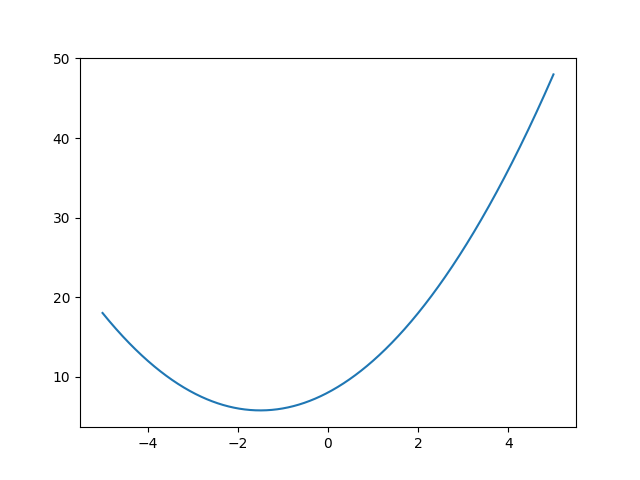

In [5]:
#Pre-Run
fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

#Run Gradient Descent
steps=100
range_list=[-5,5]
backend_data=gradient_descent_general(f1,der(f1),[range_list],0.1,steps)
print(f"Minimum at x={backend_data[-1][0]} and f(x)= {backend_data[-1][1]}")

x_base=np.linspace(-5,5,1000)
y_base=f1(x_base)
ax.plot(x_base,y_base)

#Plot Animation
def grad_plot(frame):
    lngood.set_data(backend_data[frame][0],backend_data[frame][1])
    xall.append(backend_data[frame][0])
    yall.append(backend_data[frame][1])
    lnall.set_data(xall,yall)

ani=FuncAnimation(fig,grad_plot,frames=range(len(backend_data)),interval=500,repeat=False)
plt.show()

I initialized the fig and ax for plotting and the update function of Functanimation is `grad_plot` which plots red dots for each step of gradient descent and a green dot to show the most recent point. <br>
Here the frame value is equal to the index of the iteration for which the plot is to be shown.

Deleting the variable created for plotting problem 1.<br>
Although this is not of much help we have to restart the kernel because Funcanimation and matplotlib use global varibles and we encounter some issues if we run one after the other.

In [ ]:
del x_base,y_base,x_list,y_list,xall,yall,lnall,lngood,fig,ax,ani

### 2-D Polynomial
Minimize $f(x,y)=x^4 + 16x^3 + 96x^2 -256x +y^2 -4^y +262$ <br>
over the area $x = [-10,10]$ X $y = [-10,10]$. 

Everything is simillar to the first problem: the difference begin that instead of function f1 I used the function f3. <br>
The dervative is itself calculated so no need to explictly write a function for derivative.

In [6]:
def f3(lst):
    #Simillar to first problem I change the format of function definition
    # Taking a list of input parameters for the sake of
    # running generalized Gradient Descent.
    x=lst[0]
    y=lst[1]
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

Minimum at x=3.9646430850177694, y=1.9999949981348664 and f(x,y)=2.0000015628037318


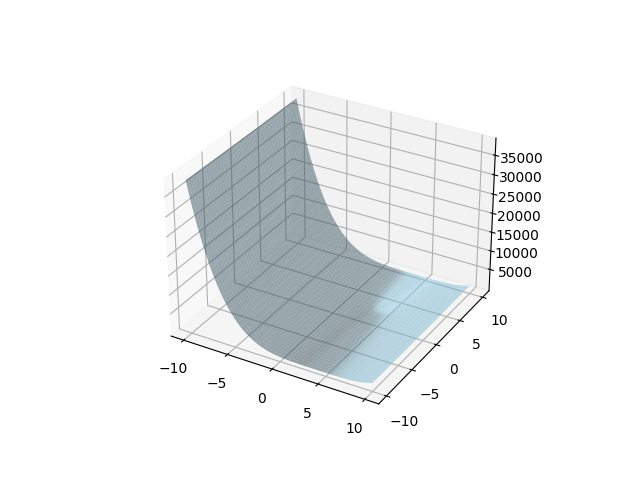

In [7]:
#Pre-Run
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.array(f3([X,Y]))
ax.plot_surface(X, Y, Z,color='skyblue', alpha=0.5)

#Run Gradient Descent
steps=100000
range_list=[[-10,10],[-10,10]]
backend_data=gradient_descent_general(f3,der(f3),range_list,0.001,steps)
print(f"Minimum at x={backend_data[-1][0]}, y={backend_data[-1][1]} and f(x,y)={backend_data[-1][2]}")

x_list=[]
y_list=[]
z_list=[]

#Plot Animation
def grad_plot(frame):
    x_list.append(backend_data[frame][0])
    y_list.append(backend_data[frame][1])
    z_list.append(backend_data[frame][2])
    ax.scatter(x_list, y_list, z_list, color='red')

ani=FuncAnimation(fig,grad_plot,frames=range(steps),interval=500,repeat=False)
plt.show()

### 2-D Function
Minimize $f(x,y)=e^{-(x-y)^2}sin(y)$ <br>
over the area $x=[-\pi,\pi]$ X $y=[-\pi,\pi]$.

In [8]:
xlim4 = [-np.pi, np.pi]
ylim4 = [-np.pi, np.pi]
def f4(lst):
    #Simillar to first problem I change the format of function definition
    # Taking a list of input parameters for the sake of
    # running generalized Gradient Descent.
    x=lst[0]
    y=lst[1]
    return exp(-(x - y)**2)*sin(y)

No need to explictly define gradient function.

Minimum at x=-1.5708263268207112, y=-1.5708213268153974 and f(x,y)=-0.9999999996624995


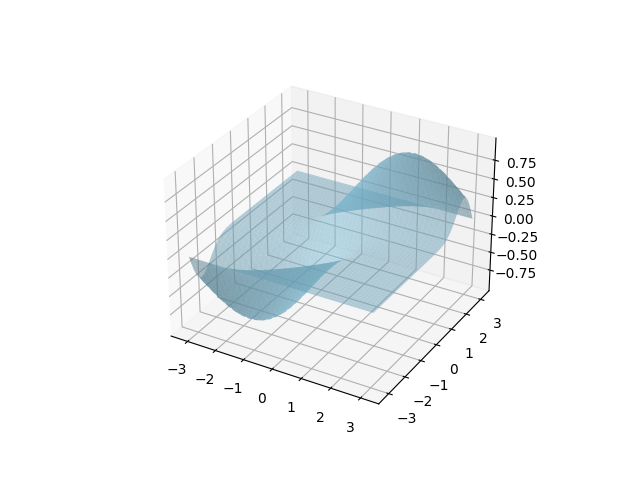

In [9]:
#Pre-Run
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(xlim4[0], xlim4[1], 100)
y = np.linspace(ylim4[0], ylim4[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array(f4([X,Y]))
ax.plot_surface(X, Y, Z,color='skyblue', alpha=0.5)

#Run Gradient Descent
steps=10000
range_list=[[-np.pi,np.pi],[-np.pi,np.pi]]
start=[-9.99,-9.99]
backend_data=gradient_descent_general(f4,der(f4),range_list,0.01,steps)
print(f"Minimum at x={backend_data[-1][0]}, y={backend_data[-1][1]} and f(x,y)={backend_data[-1][2]}")


x_list=[]
y_list=[]
z_list=[]

#Plot Animation
def grad_plot(frame):
    x_list.append(backend_data[frame][0])
    y_list.append(backend_data[frame][1])
    z_list.append(backend_data[frame][2])
    ax.scatter(x_list, y_list, z_list, color='red')

ani=FuncAnimation(fig,grad_plot,frames=range(steps),interval=500,repeat=False)
plt.show()

### 1-D Trigonometric Function
Miimize $f(x)=cos^4(x) -sin^3(x) -4sin^2(x) +cos(x) +1$ <br>
over the range $x=[0,2\pi]$.

In [10]:
def f5(lst):    
    #Simillar to first problem I change the format of function definition
    # Taking a list of input parameters for the sake of
    # running generalized Gradient Descent.
    if(isinstance(lst,list)):
        x=lst[0]
    else:
        x=lst
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

Minimum at x=1.6616558120397427 and f(x)= -4.045412051435421


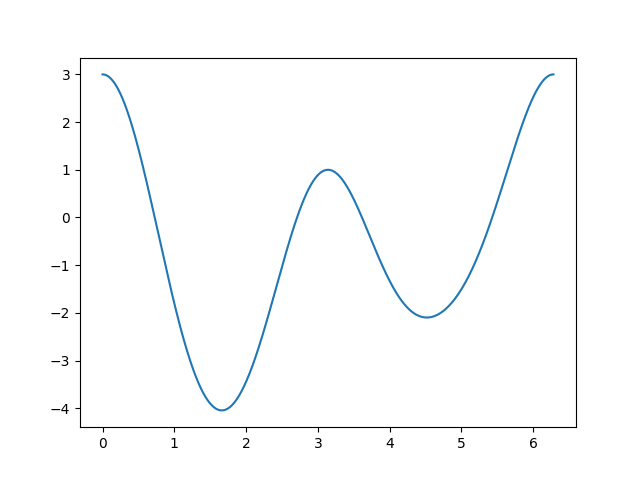

In [11]:
#Pre-Run
fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

#Run Gradient Descent
steps=1000
range_list=[0,2*np.pi]
backend_data=gradient_descent_general(f5,der(f5),[range_list],0.01,steps,start=[0.01])
print(f"Minimum at x={backend_data[-1][0]} and f(x)= {backend_data[-1][1]}")

x_base=np.linspace(0,2*np.pi,1000)
y_base=f5(x_base)
ax.plot(x_base,y_base)

#Plot Animation
def grad_plot(frame):
    lngood.set_data(backend_data[frame][0],backend_data[frame][1])
    xall.append(backend_data[frame][0])
    yall.append(backend_data[frame][1])
    lnall.set_data(xall,yall)

ani=FuncAnimation(fig,grad_plot,frames=range(steps),interval=500,repeat=False)
plt.show()